# Data preprocessing

In [1]:
import pandas as pd


# The data should be downloaded, use 1.0-download-raw-data.ipynb notebook
raw_data_path = '../data/raw/filtered.tsv'
df = pd.read_csv(raw_data_path, sep='\t', index_col=0)
df.head()

,reference,translation,similarity,lenght_diff,ref_tox,trn_tox
0,"If Alkar is flooding her with psychic waste, t...","if Alkar floods her with her mental waste, it ...",0.785171,0.010309,0.014195,0.981983
1,Now you're getting nasty.,you're becoming disgusting.,0.749687,0.071429,0.065473,0.999039
2,"Well, we could spare your life, for one.","well, we can spare your life.",0.919051,0.268293,0.213313,0.985068
3,"Ah! Monkey, you've got to snap out of it.","monkey, you have to wake up.",0.664333,0.309524,0.053362,0.994215
4,I've got orders to put her down.,I have orders to kill her.,0.726639,0.181818,0.009402,0.999348


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 577777 entries, 0 to 577776
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   reference    577777 non-null  object 
 1   translation  577777 non-null  object 
 2   similarity   577777 non-null  float64
 3   lenght_diff  577777 non-null  float64
 4   ref_tox      577777 non-null  float64
 5   trn_tox      577777 non-null  float64
dtypes: float64(4), object(2)
memory usage: 30.9+ MB


In [9]:
df.describe()

,similarity,lenght_diff,ref_tox,trn_tox
count,577777.000000,577777.000000,577777.000000,577777.000000
mean,0.758469,0.157652,0.541372,0.434490
std,0.092695,0.108057,0.457571,0.458904
min,0.600001,0.000000,0.000033,0.000033
25%,0.681105,0.066667,0.012171,0.000707
50%,0.754439,0.141791,0.806795,0.085133
75%,0.831244,0.238095,0.990469,0.973739
max,0.950000,0.400000,0.999724,0.999730


Check for NaN values.

In [7]:
df.isna().any().any()

False

Align the data so that reference will always have higher toxicity level than translation. 

In [2]:
swap_condition = df['ref_tox'] < df['trn_tox']

swapped_df = df.copy()
swapped_df.loc[swap_condition, ['reference', 'translation']] = swapped_df.loc[swap_condition, ['translation', 'reference']].values
swapped_df.loc[swap_condition, ['ref_tox', 'trn_tox']] = swapped_df.loc[swap_condition, ['trn_tox', 'ref_tox']].values

swapped_df.head()

,reference,translation,similarity,lenght_diff,ref_tox,trn_tox
0,"if Alkar floods her with her mental waste, it ...","If Alkar is flooding her with psychic waste, t...",0.785171,0.010309,0.981983,0.014195
1,you're becoming disgusting.,Now you're getting nasty.,0.749687,0.071429,0.999039,0.065473
2,"well, we can spare your life.","Well, we could spare your life, for one.",0.919051,0.268293,0.985068,0.213313
3,"monkey, you have to wake up.","Ah! Monkey, you've got to snap out of it.",0.664333,0.309524,0.994215,0.053362
4,I have orders to kill her.,I've got orders to put her down.,0.726639,0.181818,0.999348,0.009402


In [11]:
swapped_df.describe()

,similarity,lenght_diff,ref_tox,trn_tox
count,577777.000000,577777.000000,577777.000000,577777.000000
mean,0.758469,0.157652,0.940260,0.035601
std,0.092695,0.108057,0.100831,0.079399
min,0.600001,0.000000,0.500139,0.000033
25%,0.681105,0.066667,0.940145,0.000164
50%,0.754439,0.141791,0.983842,0.003456
75%,0.831244,0.238095,0.997519,0.027242
max,0.950000,0.400000,0.999730,0.499494


Now, we will repeat the plot from the [initial data exporation](https://github.com/kilimanj4r0/text-detoxification/blob/main/notebooks/1.1-initial-data-exploration.ipynb) to show the diffrenece.

In [4]:
import matplotlib.pyplot as plt


sorted_toxicities = sorted(list(zip(list(swapped_df['ref_tox']), list(swapped_df['trn_tox']))), key=lambda x: x[0])
indexes = list(range(len(sorted_toxicities)))

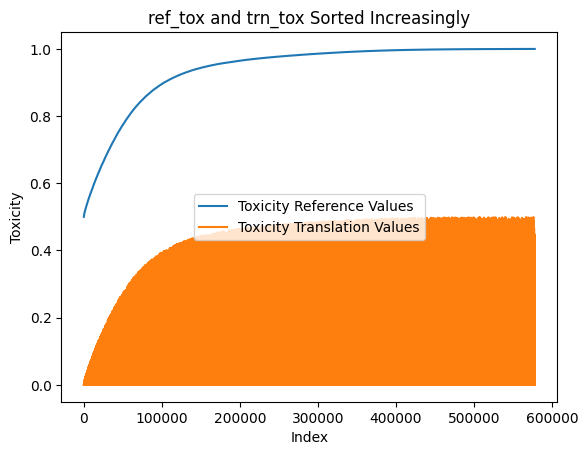

In [5]:
plt.plot(indexes, sorted_toxicities, label=('Toxicity Reference Values', 'Toxicity Translation Values'))
plt.xlabel('Index')
plt.ylabel('Toxicity')
plt.title('ref_tox and trn_tox Sorted Increasingly')
plt.legend()
# plt.show()
plt.savefig('../reports/figures/toxicities_after.png')

Looks enough for preprocessing. Further preprocessing will depend on the model. For example, tokenization step may vary. Let's save preprocessed dataframe internally.

In [9]:
import os


if not os.path.exists('../data/interim'):
    os.makedirs('../data/interim')

if not os.path.exists('../data/interim/model-outputs'):
    os.makedirs('../data/interim/model-outputs')

In [14]:
preprocessed_df_dir = '../data/interim/preprocessed_filtered.csv'
swapped_df.to_csv(preprocessed_df_dir)

## Train test split

In [3]:
import pandas as pd


preprocessed_df_dir = '../data/interim/preprocessed_filtered.csv'
preprocessed_df = pd.read_csv(preprocessed_df_dir, index_col=0)
preprocessed_df.head()

,reference,translation,similarity,lenght_diff,ref_tox,trn_tox
0,"if Alkar floods her with her mental waste, it ...","If Alkar is flooding her with psychic waste, t...",0.785171,0.010309,0.981983,0.014195
1,you're becoming disgusting.,Now you're getting nasty.,0.749687,0.071429,0.999039,0.065473
2,"well, we can spare your life.","Well, we could spare your life, for one.",0.919051,0.268293,0.985068,0.213313
3,"monkey, you have to wake up.","Ah! Monkey, you've got to snap out of it.",0.664333,0.309524,0.994215,0.053362
4,I have orders to kill her.,I've got orders to put her down.,0.726639,0.181818,0.999348,0.009402


In [10]:
from sklearn.model_selection import train_test_split


train_df, test_df = train_test_split(preprocessed_df, test_size=0.025, random_state=42)  # Low percent due to computational time limits
train_df, val_df = train_test_split(train_df, test_size=0.1, random_state=42)

Save the splits

In [11]:
train_df_dir = '../data/interim/train.csv'
val_df_dir = '../data/interim/val.csv'
test_df_dir = '../data/interim/test.csv'

train_df.to_csv(train_df_dir)
val_df.to_csv(val_df_dir)
test_df.to_csv(test_df_dir)

In [12]:
len(train_df), len(val_df), len(test_df)

(506998, 56334, 14445)